NAME : ANSHIMA GARG 

**Objective**: 
To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above)
* Perform Data Preparation by cleaning the data and removing null values.
* Identify Which genres have higher user ratings.
* Identify the trend of user ratings based on pricing.
* State your inferences.


In [1]:
# Load packages and data.
# Packages for data manipulation and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import warnings


# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
warnings.filterwarnings('ignore')

#### LOAD DATASET

In [2]:
data=pd.read_csv("appstore_games (2).csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


##### SUMMARIZE THE DATASET

In [3]:
# shape
print(data.shape)


(17007, 18)


In [4]:
# descriptions

print(data.describe())

                 ID  Average User Rating  User Rating Count         Price  \
count  1.700700e+04          7561.000000       7.561000e+03  16983.000000   
mean   1.059614e+09             4.060905       3.306531e+03      0.813419   
std    2.999676e+08             0.751428       4.232256e+04      7.835732   
min    2.849214e+08             1.000000       5.000000e+00      0.000000   
25%    8.996543e+08             3.500000       1.200000e+01      0.000000   
50%    1.112286e+09             4.500000       4.600000e+01      0.000000   
75%    1.286983e+09             4.500000       3.090000e+02      0.000000   
max    1.475077e+09             5.000000       3.032734e+06    179.990000   

               Size  
count  1.700600e+04  
mean   1.157064e+08  
std    2.036477e+08  
min    5.132800e+04  
25%    2.295014e+07  
50%    5.676895e+07  
75%    1.330271e+08  
max    4.005591e+09  


In [5]:
# INFORMATION OF DATA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

#### REMOVAL OF UNNECESSARY COLUMNS 

In [6]:
table= data.drop(columns=["Icon URL","URL","Description","Developer"])
table.head()

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [7]:
#COLUMN NAMES

column_name=table.columns

In [8]:
#TOTAL NaN VALUES IN ALL COLUMNS

null=[]
for i in column_name:
    count1=sum(table[i].isna())
    null.append(count1)
    print(i,count1)
print(null)    
    

ID 0
Name 0
Subtitle 11746
Average User Rating 9446
User Rating Count 9446
Price 24
In-app Purchases 9324
Age Rating 0
Languages 60
Size 1
Primary Genre 0
Genres 0
Original Release Date 0
Current Version Release Date 0
[0, 0, 11746, 9446, 9446, 24, 9324, 0, 60, 1, 0, 0, 0, 0]


In [9]:
#TOTAL VALUE IN ALL THE COLUMNS

table.count() 

ID                              17007
Name                            17007
Subtitle                         5261
Average User Rating              7561
User Rating Count                7561
Price                           16983
In-app Purchases                 7683
Age Rating                      17007
Languages                       16947
Size                            17006
Primary Genre                   17007
Genres                          17007
Original Release Date           17007
Current Version Release Date    17007
dtype: int64

### % NaN value in different COLUMNS

#### SUBTITLE : 
####   69%

#### IN-APP PURCHASES 
####    55%
### REMOVETHE COLUNMS THAT HAVE MORE THAN 55% NaN VALUES



In [10]:
table1=table.drop(columns=["Subtitle","In-app Purchases"])
table1.head(7)

,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,286210009,Sudoku - Classic number puzzle,3.0,47.0,0.00,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,286313771,Gravitation,2.5,35.0,0.00,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013


In [11]:
#REMOVING ROWS WITH NaN VALUES

table1=table1.dropna()
table1.shape

(7537, 12)


#### REMOVE THE ROWS WHICH HAVE USER RATING COUNT<100

In [64]:
import datetime
table1["Original Release Date"]=pd.to_datetime(table1["Original Release Date"])
table1["Current Version Release Date"]=pd.to_datetime(table1["Current Version Release Date"])
table1["Update_gap"]=table1["Current Version Release Date"]-table1["Original Release Date"]
user_lt_200_count=table1[table1["User Rating Count"]<100].index

In [65]:
table1.drop(user_lt_200_count,inplace=True)
print(table1.shape)

(2886, 13)


#### CONVERT APP BYTES INTO MB'S 

In [14]:
table1["Size"] = table1["Size"].map(lambda x: round(x/(1024 * 1024), 2))
table1.head()

,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Update_gap
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,3.5,284.0,1.99,4+,EN,11.76,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,3.0,8376.0,0.00,4+,EN,0.64,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.55,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
7,286363959,Colony,2.5,125.0,0.99,4+,EN,61.35,Games,"Games, Strategy, Board",2008-03-08,2018-03-10,3654 days


#### PRIMARY GENRE LIST:

In [15]:
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)
print("PRIMARY GENRE : ")    
primary_genre=unique(list(table1["Primary Genre"]))
print(primary_genre)

PRIMARY GENRE : 
['Book' 'Education' 'Entertainment' 'Finance' 'Games' 'Health & Fitness'
 'Lifestyle' 'Medical' 'Navigation' 'News' 'Productivity' 'Reference'
 'Shopping' 'Social Networking' 'Sports' 'Utilities']


#### COUNT OF ELEMENTS OF PRIMARY GENRES

In [16]:
table1.groupby(["Primary Genre"])["Genres"].count()

Primary Genre
Book                    2
Education              14
Entertainment          25
Finance                 6
Games                2799
Health & Fitness        2
Lifestyle               2
Medical                 2
Navigation              1
News                    1
Productivity            1
Reference               6
Shopping                1
Social Networking       1
Sports                  8
Utilities              15
Name: Genres, dtype: int64

#### GENRE LIST

In [17]:
print("GENRES : ") 
genre_list=unique(list(table1["Genres"]))
print(genre_list)

GENRES : 
['Books, Games, Board, Strategy' 'Books, Role Playing, Games, Strategy'
 'Education, Games, Puzzle, Strategy' 'Education, Games, Strategy'
 'Education, Games, Strategy, Family' 'Education, Puzzle, Strategy, Games'
 'Education, Strategy, Family, Games' 'Education, Strategy, Games'
 'Entertainment, Action, Games, Strategy'
 'Entertainment, Action, Strategy, Games'
 'Entertainment, Adventure, Games, Strategy'
 'Entertainment, Card, Games, Strategy'
 'Entertainment, Card, Strategy, Games'
 'Entertainment, Casual, Games, Strategy'
 'Entertainment, Games, Action, Strategy'
 'Entertainment, Games, Adventure, Strategy'
 'Entertainment, Games, Board, Strategy'
 'Entertainment, Games, Card, Strategy'
 'Entertainment, Games, Puzzle, Strategy'
 'Entertainment, Games, Strategy, Card'
 'Entertainment, Games, Strategy, Casual'
 'Entertainment, Games, Strategy, Trivia'
 'Entertainment, Puzzle, Strategy, Games' 'Entertainment, Strategy, Games'
 'Entertainment, Strategy, Games, Board'
 'Entert

#### COUNT OF ELEMENTS OF GENRES

In [18]:
for i in genre_list:
    print(i," ",list(table1["Genres"]).count(i))

Books, Games, Board, Strategy   1
Books, Role Playing, Games, Strategy   1
Education, Games, Puzzle, Strategy   1
Education, Games, Strategy   7
Education, Games, Strategy, Family   1
Education, Puzzle, Strategy, Games   1
Education, Strategy, Family, Games   1
Education, Strategy, Games   3
Entertainment, Action, Games, Strategy   1
Entertainment, Action, Strategy, Games   1
Entertainment, Adventure, Games, Strategy   1
Entertainment, Card, Games, Strategy   1
Entertainment, Card, Strategy, Games   1
Entertainment, Casual, Games, Strategy   1
Entertainment, Games, Action, Strategy   1
Entertainment, Games, Adventure, Strategy   1
Entertainment, Games, Board, Strategy   1
Entertainment, Games, Card, Strategy   1
Entertainment, Games, Puzzle, Strategy   1
Entertainment, Games, Strategy, Card   1
Entertainment, Games, Strategy, Casual   2
Entertainment, Games, Strategy, Trivia   1
Entertainment, Puzzle, Strategy, Games   1
Entertainment, Strategy, Games   1
Entertainment, Strategy, Games

Games, Strategy, Sports, Entertainment   2
Games, Strategy, Sports, Lifestyle   1
Games, Strategy, Sports, Racing   1
Games, Strategy, Sports, Sports   9
Games, Strategy, Trivia   2
Games, Strategy, Trivia, Entertainment   1
Games, Strategy, Word, Entertainment   1
Games, Travel, Strategy, Word   1
Games, Trivia, Entertainment, Strategy   1
Games, Trivia, Strategy   1
Games, Trivia, Strategy, Entertainment   1
Games, Trivia, Strategy, Lifestyle   1
Games, Utilities, Board, Strategy   1
Games, Utilities, Strategy, Casual   1
Games, Word, Books, Strategy   1
Games, Word, Strategy   2
Health & Fitness, Strategy, Games, Role Playing   2
Lifestyle, Games, Trivia, Strategy   1
Lifestyle, Role Playing, Games, Strategy   1
Medical, Adventure, Strategy, Games   2
Navigation, Strategy, Games, Trivia   1
News, Games, Strategy, Action   1
Productivity, Strategy, Action, Games   1
Reference, Adventure, Games, Strategy   1
Reference, Games, Family, Strategy   1
Reference, Games, Strategy   1
Referen

In [19]:
#SUM OF USER RATING COUNT OF GENRES

user_genre=pd.DataFrame(table1.groupby("Primary Genre")["User Rating Count"].sum())
user_genre.reset_index(level=0, inplace=True)
user_genre

,Primary Genre,User Rating Count
0,Book,259.0
1,Education,5067.0
2,Entertainment,14153.0
3,Finance,61791.0
4,Games,24522205.0
5,Health & Fitness,884.0
6,Lifestyle,986.0
7,Medical,2458.0
8,Navigation,1094.0
9,News,370.0


#### BAR PLOT OF ALL PRIMARY GENRES WITH USER RATING COUNT   (ALL GENRES) 

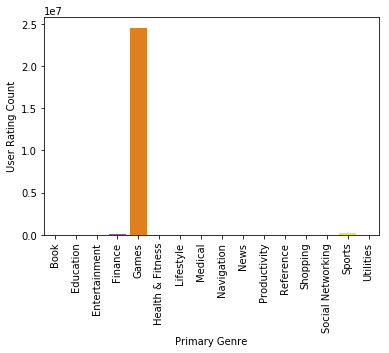

In [20]:
b=sns.barplot(x='Primary Genre',y='User Rating Count',data=user_genre,palette="Set1")
c1=b.set_xticklabels(b.get_xticklabels(), rotation=90)

Games Genre has the maximum User Rating Count with respect to other Genres

#### VISUALISATION OF OTHER GENRES WITH THEIR USER RATING COUNT  (ALL GENRES) 

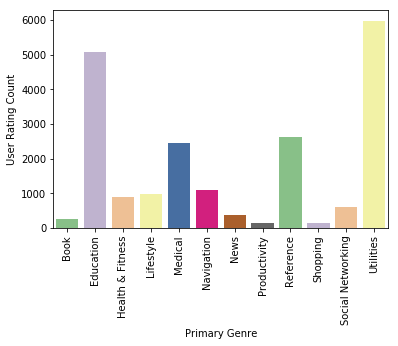

In [21]:
#Remove rows with user rating count>10000
count_lt_10000=user_genre[user_genre["User Rating Count"]>10000].index
new=user_genre.drop(count_lt_10000)
#plotting bar graph of primary genres with <10000 user rating count
b1=sns.barplot(x='Primary Genre',y='User Rating Count',data=new,palette="Accent")
c=b1.set_xticklabels(b1.get_xticklabels(), rotation=90)


Between not so common genres Utilities genere has the most User Rating Count and then Education

#### VISUALISATION OF GENRES WITH THEIR USER RATING COUNT>10000 

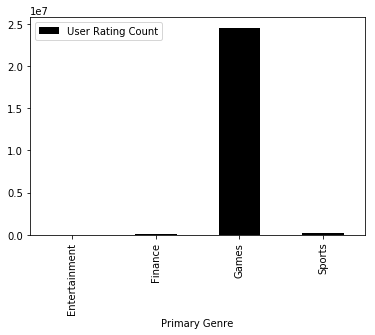

In [22]:
#Remove rows with user rating count<10000
count_gt_10000=user_genre[user_genre["User Rating Count"]<10000].index
new1=user_genre.drop(count_gt_10000)
#plotting bar graph of primary genres with >10000 user rating count
plott=new1.plot(kind='bar',x='Primary Genre',y='User Rating Count',color="black")

#### GROUP THE TABLE BY PRIMARY GENRE

In [23]:
primary_table=table1.groupby("Primary Genre")
primary_table.first()


,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Update_gap
Primary Genre,,,,,,,,,,,,
Book,428149193,Go Books,4.0,156.0,0.00,4+,"EN, FR, DE, JA, ES",19.34,"Books, Games, Board, Strategy",2011-11-04,2018-11-17,2570 days
Education,495077699,Math Duel - Two Player Split Screen Mathematic...,4.5,248.0,2.99,4+,EN,15.82,"Education, Games, Strategy",2012-01-19,2015-11-01,1382 days
Entertainment,318280645,Age of Conquest: Europe,3.5,267.0,3.99,12+,EN,37.26,"Entertainment, Games, Board, Strategy",2009-06-16,2018-12-10,3464 days
Finance,324331173,Stock Wars - Virtual Investing,3.5,3015.0,0.00,4+,EN,9.67,"Finance, Simulation, Games, Strategy",2009-10-29,2017-11-28,2952 days
Games,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
Health & Fitness,1073986257,Run An Empire,4.5,442.0,0.00,4+,EN,217.67,"Health & Fitness, Strategy, Games, Role Playing",2018-01-10,2019-06-27,533 days
Lifestyle,998893015,Warhammer Age of Sigmar,3.0,242.0,0.00,12+,EN,60.42,"Lifestyle, Role Playing, Games, Strategy",2015-07-18,2019-07-20,1463 days
Medical,348741265,Bungee Stickmen - Australian Landmarks {LITE +},3.0,1229.0,0.00,12+,"ZH, EN, FR, DE, IT, JA, ES",10.28,"Medical, Adventure, Strategy, Games",2010-01-13,2010-02-27,45 days
Navigation,1393766538,#1 Fortnite Weekly Quick Quiz,4.0,1094.0,0.00,4+,EN,11.39,"Navigation, Strategy, Games, Trivia",2018-09-07,2018-09-07,0 days


In [24]:
# MAKE A TABLE FOR "GAMES" ROW 

primary_table.get_group("Games")

#MAKE A LIST OF GENRES AVAILABLE IN "GAMES" PRIMARY GENRE

list_games_genre=list(primary_table.get_group("Games")["Genres"])
print(len(list_games_genre))
list_games_genre[:20]   #initial 20 values

2799


['Games, Strategy, Puzzle',
 'Games, Strategy, Board',
 'Games, Board, Strategy',
 'Games, Strategy, Puzzle',
 'Games, Strategy, Board',
 'Games, Casual, Strategy',
 'Games, Puzzle, Strategy',
 'Games, Strategy, Entertainment',
 'Games, Puzzle, Strategy',
 'Games, Puzzle, Strategy, Entertainment',
 'Games, Strategy, Board',
 'Games, Strategy, Board',
 'Games, Board, Strategy',
 'Games, Puzzle, Strategy',
 'Games, Strategy, Puzzle, Entertainment',
 'Games, Puzzle, Entertainment, Strategy',
 'Games, Strategy, Puzzle',
 'Games, Entertainment, Action, Strategy',
 'Games, Entertainment, Strategy, Board',
 'Games, Board, Entertainment, Strategy']

### SEPERATE DATAFRAME FOR STRATEGY GAMES

In [25]:
primary_table1=table1.groupby("Primary Genre")
Strategy_games=primary_table1.get_group("Games")
Strategy_games.head()

,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Update_gap
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,3.5,284.0,1.99,4+,EN,11.76,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,3.0,8376.0,0.00,4+,EN,0.64,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.55,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
7,286363959,Colony,2.5,125.0,0.99,4+,EN,61.35,Games,"Games, Strategy, Board",2008-03-08,2018-03-10,3654 days


In [26]:
#DROP UNNECESSSARY COLUMN(PRIMARY GENRE)

Strategy_games.drop(columns=["Primary Genre"]).head()

,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Update_gap
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,3.5,284.0,1.99,4+,EN,11.76,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,3.0,8376.0,0.00,4+,EN,0.64,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.55,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
7,286363959,Colony,2.5,125.0,0.99,4+,EN,61.35,"Games, Strategy, Board",2008-03-08,2018-03-10,3654 days


### SIMPLYFYING THE GENRES IN DIFFERNT GENRES 

In [27]:
x=list(Strategy_games["Genres"])
for i in range(len(x)):
    if (" Puzzle" in x[i]) or (" Board" in x[i]) or (" Card" in x[i]) or (" Trivia" in x[i]):
        x[i]="Puzzle"
    if (" Entertainment" in x[i]) or (" Family" in x[i]) or (" Casual" in x[i]) or (" Adventure" in x[i]) or  ( " Travel" in x[i]):
        x[i]="Entertainment"
    
    if (" Action" in x[i]):
        x[i]="Action"
    if (" Simulation" in x[i]) or (" Role Playing" in x[i]) :
        x[i]="Simulation"
    if (" Social Networking" in x[i]) or ( " Music" in x[i]) or (" Sports" in x[i]) or  ( " Casino" in x[i]) or  ( " Racing" in x[i]) or  ( " Word" in x[i])or  ( " Education" in x[i]) or  ( "Games" in x[i]):
        x[i]="Sports"
len(x)


2799

**PUZZLE includes** :
* Puzzle , Board , Card , Trivia 

**ENTERTAINMENT includes** :
* Entertainment , Family , Casual , Adventure , Travel 

**ACTION includes :**
* Action

**SIMULATION includes :**
* Simulation , Role Playing 

**SPORTS includes :**
* Social Networking , Music , Sports , Casino , Racing , Word ,Education , Games

In [28]:
#REPLACING VALUES OF GENRES 

Strategy_games["Genres"]=x

In [29]:
Strategy_games.drop(columns=["Primary Genre"]).head()

,ID,Name,Average User Rating,User Rating Count,Price,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Update_gap
0,284921427,Sudoku,4.0,3553.0,2.99,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,Puzzle,2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,3.5,284.0,1.99,4+,EN,11.76,Puzzle,2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,3.0,8376.0,0.00,4+,EN,0.64,Puzzle,2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),3.5,190394.0,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.55,Puzzle,2008-07-23,2017-05-30,3233 days
7,286363959,Colony,2.5,125.0,0.99,4+,EN,61.35,Puzzle,2008-03-08,2018-03-10,3654 days


### NUMBER OF GAMES IN DIFFERENT GENRES 

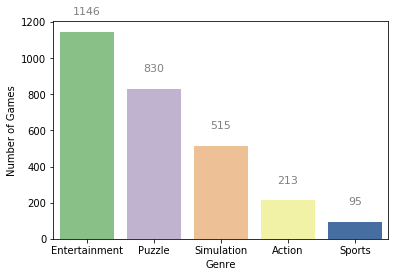

In [30]:
y=list(Strategy_games["Genres"].value_counts())
x=["Entertainment","Puzzle","Simulation","Action","Sports"]
vis=sns.barplot(x,y,palette='Accent')
vis.set(xlabel='Genre',ylabel='Number of Games')
for p in vis.patches:
             vis.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

**Entertainment Genre in sub Genres has the maximum number of games**

**Entertainment genre also the games of the sub catergory "Family ,Casual ,Adventure ,Travel**

### Analysis of User Rating Count with Genres

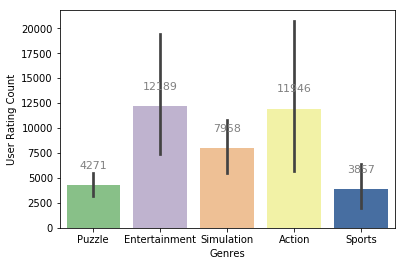

In [31]:
vis1=sns.barplot(x="Genres", y="User Rating Count", data=Strategy_games,palette='Accent');
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')


Entertainment and Action is mostly rated genres by Users

### Analysis of Average User Rating with Genres

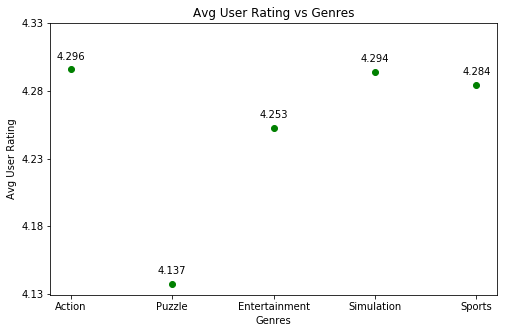

In [32]:
p=Strategy_games.groupby("Genres")
y1=[]
plt.figure(figsize=(8,5))
y1.append(p.get_group("Action")["Average User Rating"].mean())
y1.append(p.get_group("Puzzle")["Average User Rating"].mean())
y1.append(p.get_group("Entertainment")["Average User Rating"].mean())
y1.append(p.get_group("Simulation")["Average User Rating"].mean())
y1.append(p.get_group("Sports")["Average User Rating"].mean())
x1=["Action","Puzzle","Entertainment","Simulation","Sports"]
plt.plot(x1,y1,'go')

# zip joins x and y coordinates in pairs
for x,y in zip(x1,y1):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.title("Avg User Rating vs Genres")
plt.ylabel("Avg User Rating")
plt.xlabel("Genres")

plt.yticks(np.arange(4.13,4.35,0.05))

plt.show()

Action and Simulation Genres have the highest Average User Rating.

### Multidimensional Relationships between Strategy Games


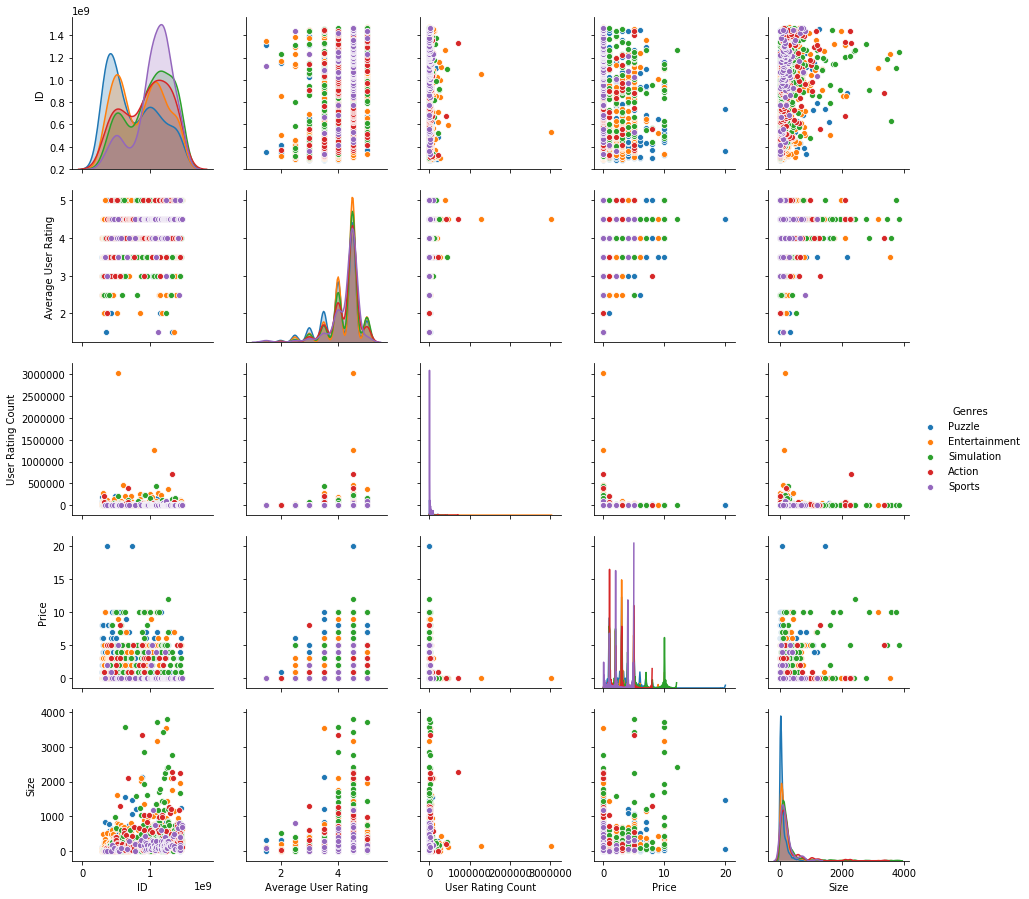

In [33]:
sns.pairplot(data=Strategy_games, hue="Genres");

### Analysis of App Size and App Price with Genres 

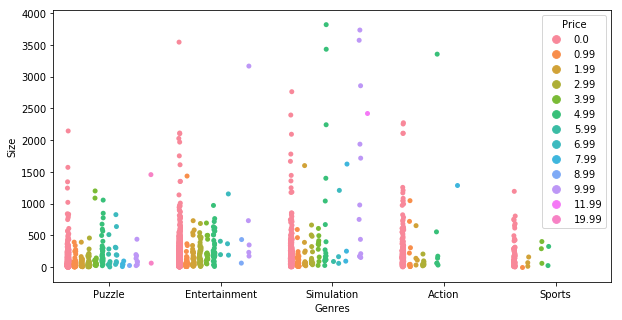

In [34]:
plt.figure(figsize=(10,5))
vis2 = sns.stripplot(y="Size", x="Genres", data=Strategy_games,hue="Price", dodge=1)


Simulation games have high size (majorly in GB) and expensive games are geneally more in size.

### NUMBER OF APPS IN DIFFERENT AGE CATEGORY

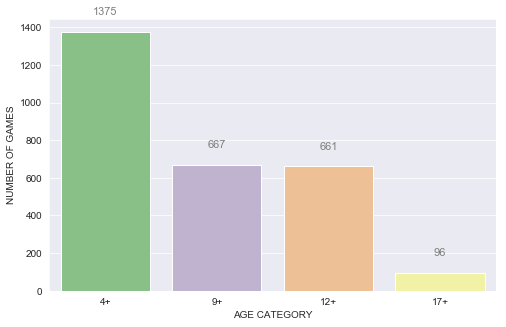

In [66]:
y=list(Strategy_games["Age Rating"].value_counts())
plt.figure(figsize=(8,5))
x=["4+","9+","12+","17+"]
vis4=sns.barplot(x,y,palette="Accent")
for p in vis4.patches:
             vis4.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
C=vis4.set(xlabel="AGE CATEGORY" , ylabel="NUMBER OF GAMES")        

4+ age catergory games are highest in number. 9+ and 12 + are almost equal.

### ANALYSIS OF NUMBER OF GAMES IN DIFFERENT GENRES WITH AGE FACTOR

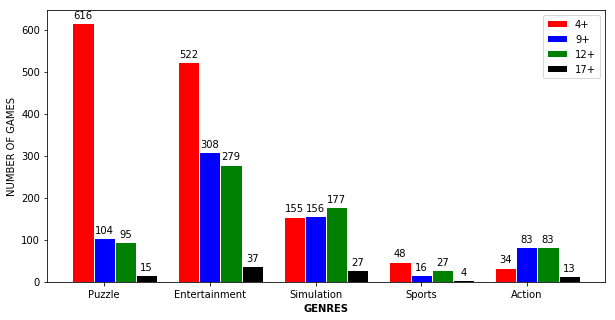

In [36]:
#NO OF GAMES IN VARIOUS AGE GROUPS 
y1=[Strategy_games.groupby("Age Rating").get_group("4+")["Genres"].value_counts()]
y2=[Strategy_games.groupby("Age Rating").get_group("9+")["Genres"].value_counts()]
y3=[Strategy_games.groupby("Age Rating").get_group("12+")["Genres"].value_counts()]
y4=[Strategy_games.groupby("Age Rating").get_group("17+")["Genres"].value_counts()]

#data = {'Genres':["Puzzle","Entertainment","Simulation","Sports","Action"], '4+':[616, 522, 155 ,48,34],'9+':[104, 308, 156 ,16,83],'12+':[95, 279, 177 ,27,83],'17+':[15, 37, 27 ,4,13]} 
#data=pd.DataFrame(data)
#data
plt.figure(figsize=(10,5))

labels = ["Puzzle","Entertainment","Simulation","Sports","Action"]
list_4_plus=[616, 522, 155 ,48,34]
list_9_plus=[104, 308, 156 ,16,83]
list_12_plus=[95, 279, 177 ,27,83]
list_17_plus= [15, 37, 27 ,4,13]

x = np.arange(len(labels))  # the label locations
barWidth = 0.2  # the width of the bars
r1 = np.arange(len(list_12_plus))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

a=plt.bar(r1, list_4_plus, color='red', width=barWidth, edgecolor='white', label='4+')
b=plt.bar(r2, list_9_plus, color='blue', width=barWidth, edgecolor='white', label='9+')
c=plt.bar(r3,list_12_plus , color='green', width=barWidth, edgecolor='white', label='12+')
d=plt.bar(r4,list_17_plus , color='black', width=barWidth, edgecolor='white', label='17+')

plt.xlabel('GENRES', fontweight='bold')
plt.ylabel("NUMBER OF GAMES")
plt.xticks([r + barWidth for r in range(len(list_4_plus))],["Puzzle","Entertainment","Simulation","Sports","Action"])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(a)
autolabel(b)
autolabel(c)
autolabel(d)
plt.legend()
plt.show()

The 4+ age category games are mostly puzzles and entertainment based.

### ANALYSIS OF MEAN USER RATING WITH AGE CATEGORY

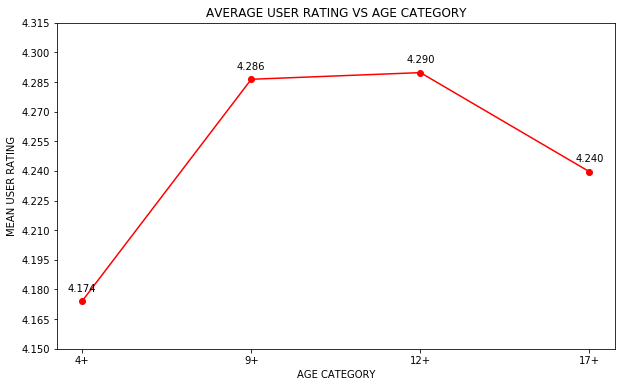

In [37]:
mean=[]
plt.figure(figsize=(10,6))
mean.append(Strategy_games.groupby("Age Rating").get_group("4+")["Average User Rating"].mean())
mean.append(Strategy_games.groupby("Age Rating").get_group("9+")["Average User Rating"].mean())
mean.append(Strategy_games.groupby("Age Rating").get_group("12+")["Average User Rating"].mean())
mean.append(Strategy_games.groupby("Age Rating").get_group("17+")["Average User Rating"].mean())
value=["4+","9+","12+","17+"]

plt.plot(value,mean,'ro-')

#GET RESPECTIVE VALUES ON TOP OF POINTS
for x,y in zip(value,mean):

    label = "{:.3f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 

plt.yticks(np.arange(4.15,4.32,0.015))
plt.title("AVERAGE USER RATING VS AGE CATEGORY")
plt.xlabel("AGE CATEGORY")
plt.ylabel("MEAN USER RATING")
plt.show()

The 9+ and 12+ age category games are highly liked and rated.

### ANALYSIS OF APP PRICE WITH GENRES WITH AVG USER RATING 

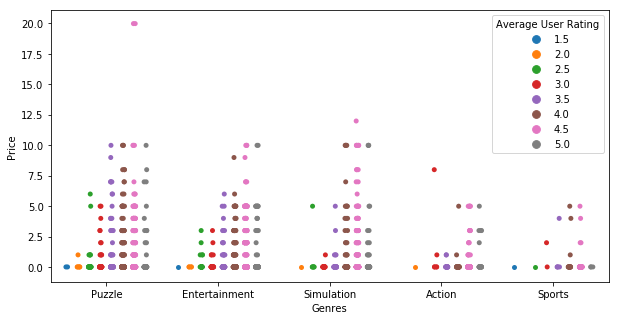

In [38]:
plt.figure(figsize=(10,5))
vis2 = sns.stripplot(y="Price", x="Genres", data=Strategy_games,hue="Average User Rating", dodge=1)


Higher price apps have better app rating .

In [63]:
Strategy_games.groupby("Average User Rating").get_group(5.0)["Languages"].value_counts()

EN                                                                                                                                    140
EN, JA, ZH                                                                                                                             11
EN, FR, DE, JA, KO, PT, RU, ZH, ES, ZH                                                                                                  7
EN, JA, ZH, ZH                                                                                                                          5
EN, PT                                                                                                                                  5
ZH, DA, NL, EN, FR, DE, IT, JA, KO, NO, PL, PT, RU, ES, SV, TR                                                                          4
AR, CA, CS, DA, NL, EN, FI, FR, DE, EL, HE, HU, ID, IT, JA, KO, MS, NB, PL, PT, RO, RU, ZH, SK, ES, SV, TH, ZH, TR, UK, VI              4
EN, RU                            

### TOP 5 FAMOUS GAMES HAVING 5.0 RATING AND MAXIMUM USER RATING COUNT

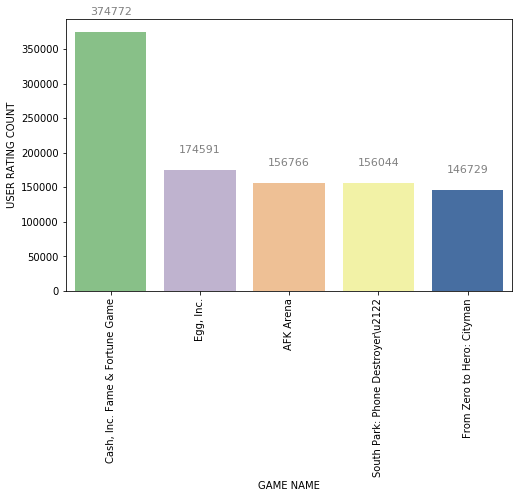

In [39]:
Strategy_games.groupby(["Average User Rating"]).get_group(5.0)["User Rating Count"].sort_values(ascending=False)[:5]
Strategy_games.set_index("ID")
plt.figure(figsize=(8,5))
name=[]
user_count=[]
for i in [12473,6089,14155,8388,13261]:
    name.append(Strategy_games.get_value(i, 'Name'))
    user_count.append(Strategy_games.get_value(i, 'User Rating Count')) 
pp=sns.barplot(name,user_count,palette="Accent")    
c=pp.set_xticklabels(pp.get_xticklabels(), rotation=90)
for p in pp.patches:
             pp.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
X=pp.set(xlabel="GAME NAME",ylabel="USER RATING COUNT")        


THESE 5 GAMES HAVE 5.0 RATINGS AND ARE RATED THE MOST BY THE USERS.

In [54]:
l=[]
for i in ['Cash, Inc. Fame & Fortune Game', 'Egg, Inc.', 'AFK Arena', 'South Park: Phone Destroyer\\u2122', 'From Zero to Hero: Cityman']:
    l.append(list(Strategy_games[Strategy_games["Name"]==i]["Genres"]))
print("GENRES OF TOP 5 GAMES")
print(['Cash, Inc. Fame & Fortune Game', 'Egg, Inc.', 'AFK Arena', 'South Park: Phone Destroyer\\u2122', 'From Zero to Hero: Cityman'])
print(l) 

GENRES OF TOP 5 GAMES
['Cash, Inc. Fame & Fortune Game', 'Egg, Inc.', 'AFK Arena', 'South Park: Phone Destroyer\\u2122', 'From Zero to Hero: Cityman']
[['Entertainment'], ['Simulation'], ['Simulation'], ['Puzzle'], ['Simulation']]


#### CATEGORIZE APP SIZE  

In [40]:
size_gt_1GB=Strategy_games[Strategy_games["Size"]>=1000]
size_moderate=Strategy_games[(Strategy_games["Size"]<1000) & (Strategy_games["Size"]>250)]
size_small=Strategy_games[Strategy_games["Size"]<=250]

### ANALYSIS OF APP SIZE WITH USER RATINGS 

[(0, 450)]

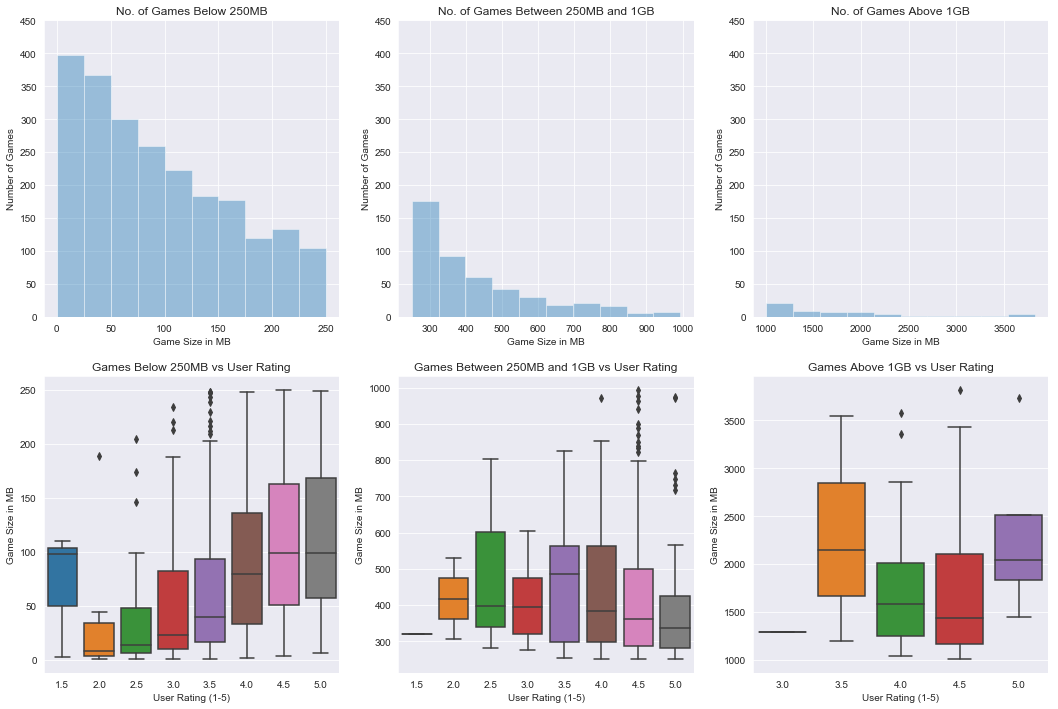

In [41]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))
vis1 = sns.boxplot( data = size_small, x = 'Average User Rating', y = 'Size',  ax=axes[1,0])
vis2 = sns.boxplot( data = size_moderate, x = 'Average User Rating', y = 'Size', ax=axes[1,1])
vis3 = sns.boxplot( data = size_gt_1GB, x = 'Average User Rating', y = 'Size', ax=axes[1,2])
vis4 = sns.distplot(size_small["Size"], bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(size_moderate["Size"], bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(size_gt_1GB["Size"], bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')

vis4.set(ylim=(0, 450))
vis5.set(ylim=(0, 450))
vis6.set(ylim=(0, 450))


### INFERENCES

* Maximum number of games available on the play store are of genres : Entertainment , Family , Casual , Adventure , Travel
* The primary genre "Games" are mostly downloaded by users .
* Further in "Games" category high rating is given to Action and simulation games.
* Age category of "4+" and "9+" are highly rated.
* As the size of app increases the app price is increased.
* As the price increases rating of app increases.
* Simulation games generally have high app size (in GB's).
* Games in many "EN" language have higest rating and are prefferd more .
* Sports games are cheap in price.
* Action and Sports are less downloaded by users.
